# Python Introduction
> Last update 08-02-2018: Maxime Chauvin, maxime.chauvin@inserm.fr

# Basics

In [2]:
# 1) Simple operations
a = 2
a += 3
a = a + 3
print a

8


In [3]:
# 2) Loops
for i in range(3):
    print i
    print i**2
print 'the end'

0
0
1
1
2
4
the end


In [4]:
# 3) Lists
L = []
L.append('CRCT')
L.append('IUCT')
L.append(4)
L.append(3.14)

for item in L:
    print item

CRCT
IUCT
4
3.14


In [5]:
# 4) Dictionaries
D = {}
D['lab'] = []
D['lab'].append('CRCT')
D['lab'].append('IRAP')
D['lab'].append('LAAS')
print D['lab']

['CRCT', 'IRAP', 'LAAS']


In [6]:
D['eq'] = {}
D['eq']['15'] = "Multiscale dosimetry for radiotherapy optimization"
D['eq']['1'] = "Antitumor immunity and immunotherapy"
print D
# print D['eq']

{'eq': {'1': 'Antitumor immunity and immunotherapy', '15': 'Multiscale dosimetry for radiotherapy optimization'}, 'lab': ['CRCT', 'IRAP', 'LAAS']}


# Usefull Libraries

## Numpy (stands for numerical python)
`sudo apt-get install python-numpy`

https://docs.scipy.org/doc/numpy-dev/user/quickstart.html

https://docs.scipy.org/doc/numpy-dev/user/numpy-for-matlab-users.html

In [7]:
import numpy as np

v = np.ones(10)
v = np.zeros(10)
v

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [8]:
v = np.arange(1,10,2)
print v

[1 3 5 7 9]


In [9]:
m = np.ones([2,3])
n = np.ones([3,2])
m[0,0]=2000
m
print np.matmul(n,m)

[[2.001e+03 2.000e+00 2.000e+00]
 [2.001e+03 2.000e+00 2.000e+00]
 [2.001e+03 2.000e+00 2.000e+00]]


In [10]:
print m.shape

(2, 3)


In [11]:
print m.size

6


In [12]:
print m.sum()

2005.0


In [13]:
n = np.zeros([2,3])
print n*m

[[0. 0. 0.]
 [0. 0. 0.]]


## Pandas (python data analysis library)
`sudo apt-get install python-pandas`

https://pandas.pydata.org/

In [14]:
import pandas as pd

df = pd.read_csv('data/AF95photons_SAF.csv')
x = df['Energy_MeV']
y = df['target095']
#print x, y
df

,Energy_MeV,target000,target001,target002,target003,target004,target005,target006,target007,target008,...,target132,target133,target134,target135,target136,target137,target138,target139,target140,target141
0,0.0050,0.000000e+00,0.000000,0.007513,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
1,0.0055,0.000000e+00,0.000000,0.009845,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
2,0.0060,0.000000e+00,0.000000,0.012663,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
3,0.0065,0.000000e+00,0.000000,0.015877,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
4,0.0070,0.000000e+00,0.000003,0.019686,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
5,0.0075,0.000000e+00,0.000009,0.023732,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
6,0.0080,0.000000e+00,0.000007,0.027974,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
7,0.0085,0.000000e+00,0.000012,0.032913,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000001,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000001,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
8,0.0090,0.000000e+00,0.000047,0.038361,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000001,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000004,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
9,0.0100,2.625107e-07,0.000214,0.050287,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000005,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000007,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00


## Matplotlib
`sudo apt-get install python-matplotlib`

https://matplotlib.org/index.html

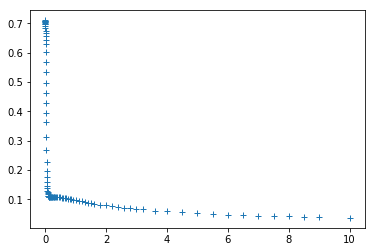

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x,y,'+')

## Plotly
`pip install plotly`

https://plot.ly/python/

In [16]:
from plotly.offline import init_notebook_mode, plot, iplot
from plotly.graph_objs import *
init_notebook_mode(connected=True)

data = Scatter(x = x,
               y = y,
               mode = 'markers')

layout = dict(title='My scatter plot',
              font=dict(family='Droid Sans Mono',size=18))

fig = dict(data=[data], layout=layout)
iplot(fig)
# plot(fig, auto_open=True)

# Some applications

## Reading a binary 3D image (.mhd) and ploting a slice

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1) Read the data
image = np.fromfile('data/AF_UINT16_299_137_348.raw', dtype=np.int16)
print image.size

14255124


In [18]:
image = image.reshape(348,137,299)
image[239,:,:]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16)

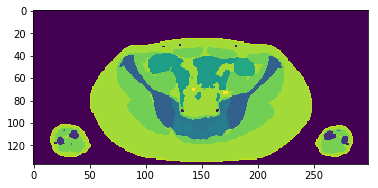

In [19]:
# 2) Plot a slice of the data
plt.imshow(image[200,:,:])

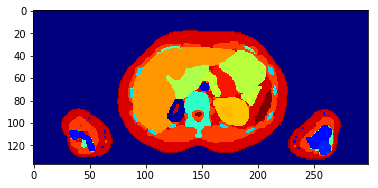

In [20]:
plt.imshow(image[239,:,:], cmap=plt.cm.jet)

## Reading - modifying - saving a DICOM image
`pip install pydicom`

In [44]:
import dicom
import matplotlib.pyplot as plt
%matplotlib inline

# 1) Read the data
# ds = dicom.read_file('data/CTSTDASIR40_H_1001_CT040.dcm')
ds = dicom.read_file('data/1.2.826.0.1.3680043.2.1143.8332244873672041917590920345008869480.dcm')
caca=ds[0x54,0x22].value
print caca[0][0x20,0x32].value
# ds

['-280.6586608887', '-279.0586853027', '-196.5419158936']


In [22]:
print ds.pixel_array.min(), ds.pixel_array.max(), ds.pixel_array.mean()

-2000 1351 -373.4282875061035


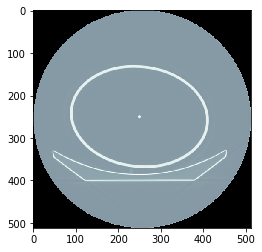

In [23]:
plt.imshow(ds.pixel_array, cmap=plt.cm.bone)

In [24]:
ds.pixel_array < 0

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

0 1351 57.876644134521484


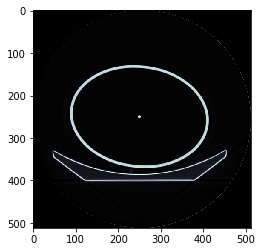

In [25]:
# 2) Modify the data
# using the very powerfull concept of masks (boolean filter)
ds.pixel_array[ds.pixel_array < 0] = 0
ds.PixelData = ds.pixel_array.tostring()

print ds.pixel_array.min(), ds.pixel_array.max(), ds.pixel_array.mean()
plt.imshow(ds.pixel_array, cmap=plt.cm.bone)

In [26]:
# 3) Save the data
ds.save_as('data/test.dcm')

# Jupyter Notebook
First install pip (pip is a special tool for installing Python packages):

`sudo apt-get install python-pip`

Then install jupyter:

`pip install jupyter`

To start the python notebook:

`jupyter notebook`

## To get this neat interface

`pip install jupyterthemes`

`jt -t oceans16 -cellw 90%`

https://github.com/dunovank/jupyter-themes

## Markdown basics
Switch the cell type to markdown and you can use markdown syntax

\# Header 1

\## Header 2

\### Header 3

\`code\`

https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet